# Bike Sharing Assignment

In [1]:
# importing required packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Step 1. Reading and understanding the data

In [2]:
#importing dataset
bike_df=pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_df.shape

(730, 16)

There are 16 columns in the data-set for which we have to observe

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

It is clear that, there is no null values present in the data

In [6]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
categorical_Columns=['season','yr','mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
bike_df[categorical_Columns]=bike_df[categorical_Columns].astype("str")

In [8]:
bike_df.dtypes

instant         int64
dteday         object
season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
bike_df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2. Visualising the data

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

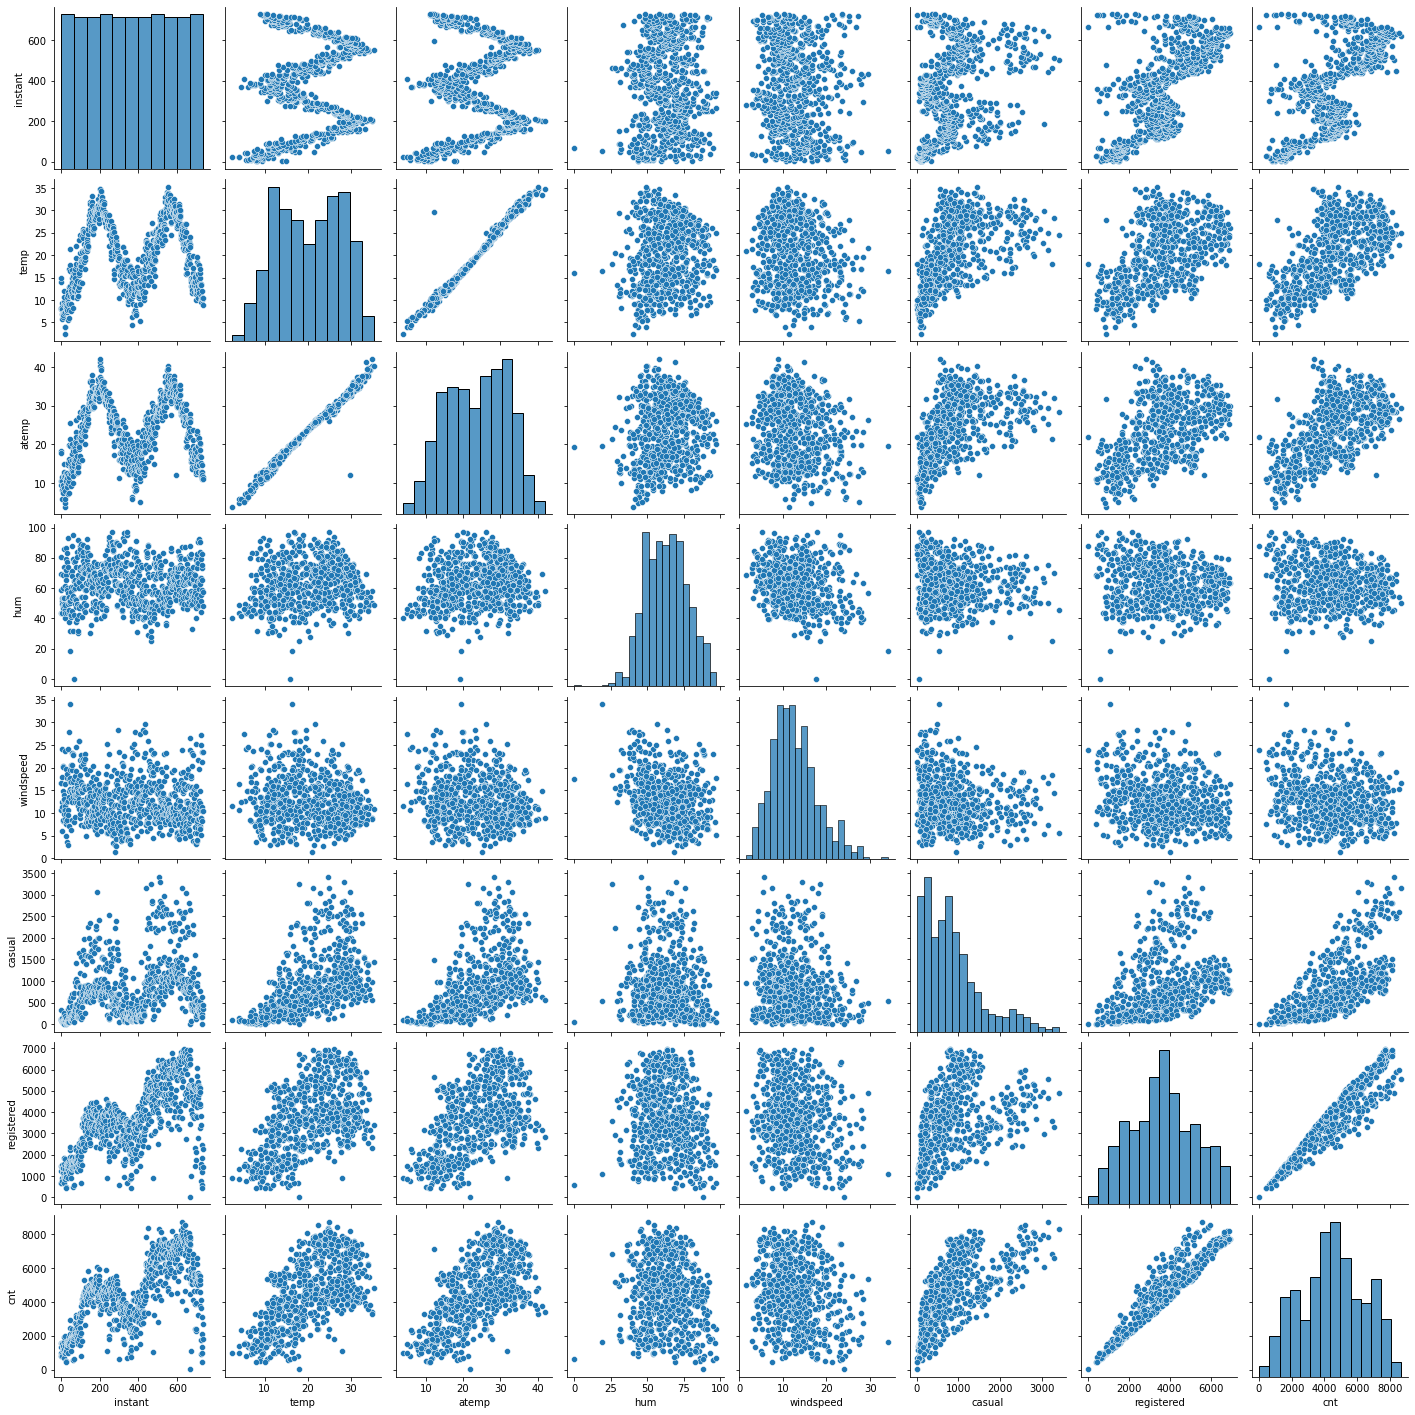

In [10]:
sns.pairplot(bike_df)
plt.show()

As from the above plot we can conclude:
1. temp and atemp are highly corelated with each other, can drop one of them.
2. We can see pattern against cnt vs registerd and casual, which is expected, as cnt is total of registered and casual columns so can drop both of them.  
3. Also drop instant columns as it is just for record index.
With further drop, when we will split our data for the model

<AxesSubplot:>

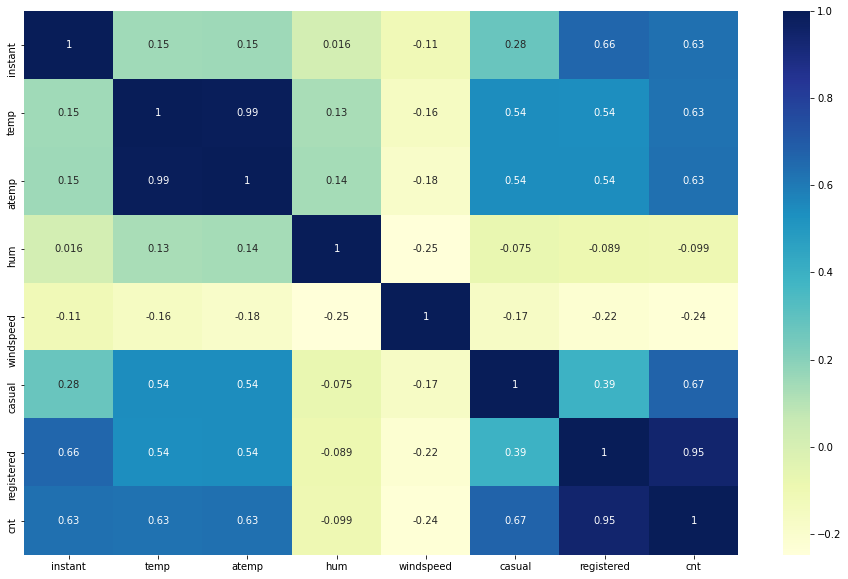

In [11]:
# we can check through plotting heatmap
numCorr = bike_df[['instant','temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
plt.figure(figsize=(16,10))
sns.heatmap(numCorr,annot=True,cmap='YlGnBu')

It is clear from above heat map, temp and atemp are highly correlated, which means one column can be drop, which will done further.

#### Visualising Categorical Variables

Let's make a boxplot for some of these variables.

<AxesSubplot:xlabel='season', ylabel='cnt'>

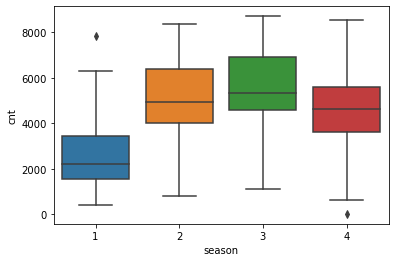

In [12]:
sns.boxplot(x='season',y='cnt',data=bike_df)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

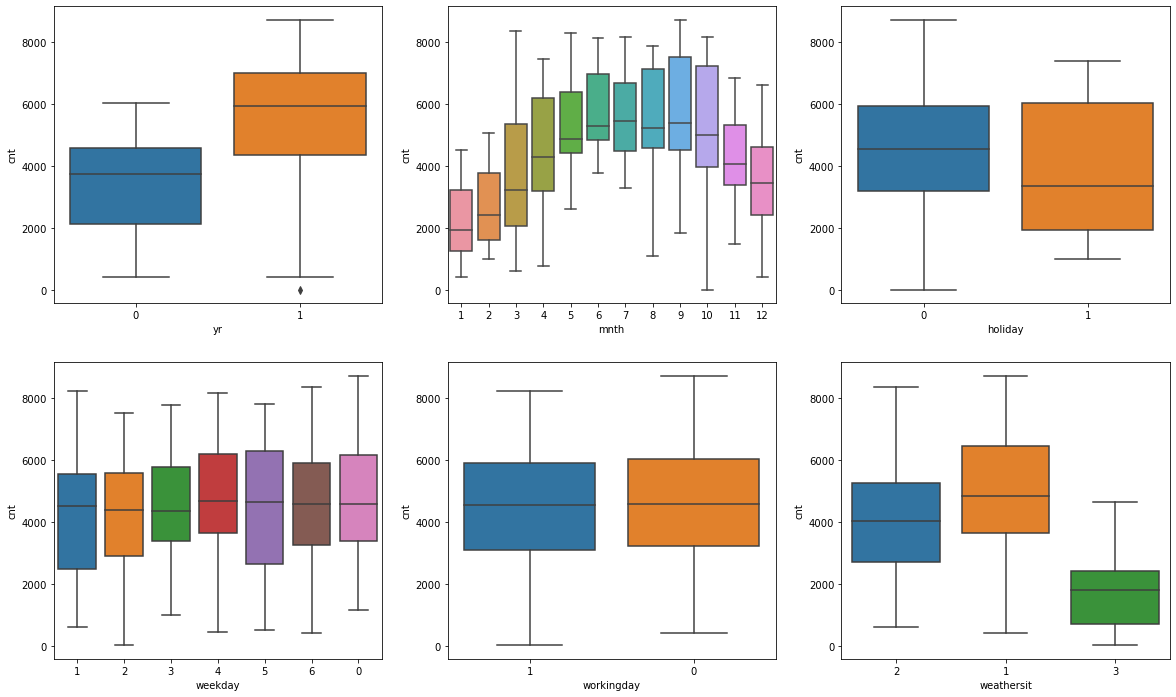

In [13]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='yr',y='cnt',data=bike_df)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data=bike_df)
plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=bike_df)
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_df)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_df)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)

As from the above plot we can conclude:
1. Holiday and workingday column have not much dependency on the cnt variable, which is the total count of rental bikes.
2. Also weekday column also show us the similar kind of dependency on the cnt varibale, which can be observe futher.

## Step 3  Data Preparation

There are many categorical variables in the data set, which needs to be converted into the appropiate data types, in order to fit a regression line.
For all the above columns we can use dummy variables.

In [14]:
categorical_Columns  # this is our categorical variables.

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [15]:
dummyVarible=pd.get_dummies(bike_df[categorical_Columns],drop_first=True) #Drop the first column from status df using 'drop_first = True'
dummyVarible.head()

,season_2,season_3,season_4,yr_1,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [16]:
#Python program to refactor
for i in dummyVarible:
    if 'season' in i:
        dummyVarible.rename(columns = {i:'S{}'.format(i.split('_')[-1])}, inplace = True)
    if 'weathersit' in i:
        dummyVarible.rename(columns = {i:'W{}'.format(i.split('_')[-1])}, inplace = True)
    if 'holiday' in i:
        dummyVarible.rename(columns = {i:'holiday'},inplace=True)
    if 'workingday' in i:
        dummyVarible.rename(columns = {i:'workingday'}, inplace = True)
    if 'yr' in i:
        dummyVarible.rename(columns = {i:'yr_2019'}, inplace = True)
    if 'mnth' in i:
        x=i.split('_')[-1]
        if x=='1':
            dummyVarible.rename(columns = {i:'Jan'}, inplace = True)
        elif x=='2':
            dummyVarible.rename(columns = {i:'Feb'}, inplace = True)
        elif x=='3':
            dummyVarible.rename(columns = {i:'Mar'}, inplace = True)
        elif x=='4':
            dummyVarible.rename(columns = {i:'Apr'}, inplace = True)
        elif x=='5':
            dummyVarible.rename(columns = {i:'May'}, inplace = True)
        elif x=='6':
            dummyVarible.rename(columns = {i:'Jun'}, inplace = True)
        elif x=='7':
            dummyVarible.rename(columns = {i:'Jul'}, inplace = True)
        elif x=='8':
            dummyVarible.rename(columns = {i:'Aug'}, inplace = True)
        elif x=='9':
            dummyVarible.rename(columns = {i:'Sep'}, inplace = True)
        elif x=='10':
            dummyVarible.rename(columns = {i:'Oct'}, inplace = True)
        elif x=='11':
            dummyVarible.rename(columns = {i:'Nov'}, inplace = True)
        elif x=='12':
            dummyVarible.rename(columns = {i:'Dec'}, inplace = True)

In [17]:
dummyVarible.head()

,S2,S3,S4,yr_2019,Oct,Nov,Dec,Feb,Mar,Apr,...,holiday,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday,W2,W3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [18]:
# Add the results to the original bike dataframe
bike_df = pd.concat([bike_df, dummyVarible], axis = 1)

In [19]:
bike_df.shape

(730, 41)

#### Dropping the columns

In [20]:
# Drop columns for which we have created the dummies
bike_df.drop(categorical_Columns, axis = 1, inplace = True)

In [21]:
# drop instant variable which is record index and dteday as it is datetime , and also there is month,weekday similar to that
bike_df.drop(['instant','dteday'],axis=1,inplace=True)

In [22]:
# drop casual and registered columns as both merge into cnt column as a column
bike_df.drop(['casual','registered'],axis=1,inplace=True)

In [23]:
# drop atemp column as it is highly correlated with the temp column
bike_df.drop(['atemp'],axis=1,inplace=True)

In [24]:
bike_df.head()

,temp,hum,windspeed,cnt,S2,S3,S4,yr_2019,Oct,Nov,...,Aug,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,W2,W3
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
bike_df.shape

(730, 27)

Now we have 27 columns/factors, against which we build our regression model.

## Step 4 Splitting the data into Training & Test Data 

In [26]:
#Split the data into train and test dataset
np.random.seed(0)
bike_train,bike_test=train_test_split(bike_df,train_size=0.7,test_size=0.3,random_state=100)

### Rescaling the feature- Training data

In [27]:
#Min-Max Scaling
scaler=MinMaxScaler()
num_vars=['temp','hum','windspeed','cnt']
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])

In [28]:
#after min-max sclaing, numerical values present b/w 0 & 1 range
bike_train.head()

,temp,hum,windspeed,cnt,S2,S3,S4,yr_2019,Oct,Nov,...,Aug,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,W2,W3
653,0.509887,0.575354,0.300794,0.864243,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
576,0.815169,0.725633,0.264686,0.827658,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
426,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
bike_train.describe()

,temp,hum,windspeed,cnt,S2,S3,S4,yr_2019,Oct,Nov,...,Aug,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,W2,W3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.507843,0.086275,0.086275,...,0.096078,0.080392,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.500429,0.281045,0.281045,...,0.294988,0.272166,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [30]:
bike_y_train=bike_train.pop('cnt')
bike_X_train=bike_train

## Step 5 Building a model

### RFE 
Recursive Feature Selection

In [31]:
#Builind a regression model
lm=LinearRegression()
lm.fit(bike_X_train,bike_y_train)

LinearRegression()

In [32]:
# Running RFE with the output number of the variable equal to 15
rfe=RFE(lm,15)
rfe=rfe.fit(bike_X_train,bike_y_train)

In [33]:
list(zip(bike_X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('S2', True, 1),
 ('S3', True, 1),
 ('S4', True, 1),
 ('yr_2019', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 8),
 ('Feb', False, 7),
 ('Mar', True, 1),
 ('Apr', True, 1),
 ('May', True, 1),
 ('Jun', False, 2),
 ('Jul', False, 6),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('weekday_1', False, 4),
 ('weekday_2', False, 3),
 ('weekday_3', False, 5),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', False, 11),
 ('W2', True, 1),
 ('W3', True, 1)]

In [34]:
#no. of columns which will be used to build a model after using recursive selection model
col=bike_X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'S2', 'S3', 'S4', 'yr_2019', 'Oct', 'Mar',
       'Apr', 'May', 'Aug', 'Sep', 'W2', 'W3'],
      dtype='object')

In [35]:
bike_X_train.columns[~rfe.support_]

Index(['Nov', 'Dec', 'Feb', 'Jun', 'Jul', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [36]:
bike_X_train=bike_X_train[col]

### Building model using statsmodel, for the detailed statistics

In [37]:
#adding constant variable
bike_X_train_lm=sm.add_constant(bike_X_train)

In [38]:
#Running a linear model
lm=sm.OLS(bike_y_train,bike_X_train_lm).fit()  

In [39]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          8.80e-187
Time:                        00:11:49   Log-Likelihood:                 508.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     494   BIC:                            -918.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2321      0.028      8.373      0.0

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [40]:
vif=pd.DataFrame()
vif['Feature']=bike_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_X_train.values,i) for i in range(bike_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,temp,25.15
1,hum,15.54
4,S3,8.83
3,S2,5.80
2,windspeed,3.92
5,S4,3.13
10,May,2.29
9,Apr,2.26
13,W2,2.14
6,yr_2019,2.05


#### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. 
Let's go ahead and drop one of variable and rebuild the model 

In [41]:
#Dropping highly insignificant variables which is Apr
bike_X_train = bike_X_train.drop('Apr', 1,)

In [42]:
#adding constant variable
bike_X_train_lm=sm.add_constant(bike_X_train)

In [43]:
# Build a model again
lm1 = sm.OLS(bike_y_train, bike_X_train_lm).fit()

In [44]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.1
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          8.68e-188
Time:                        00:13:16   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     495   BIC:                            -923.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2338      0.028      8.461      0.0

In [45]:
vif=pd.DataFrame()
vif['Feature']=bike_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_X_train.values,i) for i in range(bike_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,temp,24.63
1,hum,15.49
4,S3,8.78
2,windspeed,3.79
3,S2,3.72
5,S4,3.13
12,W2,2.14
6,yr_2019,2.04
10,Aug,1.85
9,May,1.68


In [46]:
#Dropping another highly insignificant variables which is May
bike_X_train = bike_X_train.drop('May', 1,)

In [47]:
#adding constant variable
bike_X_train_lm=sm.add_constant(bike_X_train)

In [48]:
# Build a model again
lm2 = sm.OLS(bike_y_train, bike_X_train_lm).fit()

In [47]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.98e-188
Time:                        22:59:26   Log-Likelihood:                 506.95
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     496   BIC:                            -926.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2279      0.027      8.288      0.0

In [49]:
vif=pd.DataFrame()
vif['Feature']=bike_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_X_train.values,i) for i in range(bike_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,temp,24.01
1,hum,15.45
4,S3,8.52
2,windspeed,3.72
3,S2,3.50
5,S4,3.07
11,W2,2.14
6,yr_2019,2.03
9,Aug,1.85
7,Oct,1.64


In [50]:
#Dropping another highly insignificant variables which is S3
bike_X_train = bike_X_train.drop('S3', 1,)

In [51]:
#adding constant variable
bike_X_train_lm=sm.add_constant(bike_X_train)

In [52]:
# Build a model again
lm3 = sm.OLS(bike_y_train, bike_X_train_lm).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          8.96e-189
Time:                        00:14:53   Log-Likelihood:                 505.39
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     497   BIC:                            -929.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2282      0.028      8.283      0.0

In [53]:
vif=pd.DataFrame()
vif['Feature']=bike_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_X_train.values,i) for i in range(bike_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
1,hum,14.67
0,temp,10.00
2,windspeed,3.68
4,S4,2.34
10,W2,2.13
5,yr_2019,2.02
3,S2,1.82
6,Oct,1.61
8,Aug,1.61
9,Sep,1.34


In [54]:
#Dropping another highly insignificant variables which is Mar
bike_X_train = bike_X_train.drop('Mar', 1,)

In [55]:
#adding constant variable
bike_X_train_lm=sm.add_constant(bike_X_train)

In [56]:
# Build a model again
lm4 = sm.OLS(bike_y_train, bike_X_train_lm).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          3.23e-189
Time:                        00:15:30   Log-Likelihood:                 503.60
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     498   BIC:                            -932.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.027      8.614      0.0

In [57]:
vif=pd.DataFrame()
vif['Feature']=bike_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_X_train.values,i) for i in range(bike_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
1,hum,14.34
0,temp,9.87
2,windspeed,3.57
4,S4,2.26
9,W2,2.12
5,yr_2019,2.02
3,S2,1.82
6,Oct,1.61
7,Aug,1.60
8,Sep,1.34


In [58]:
#Dropping another highly insignificant variables which is hum
bike_X_train = bike_X_train.drop('hum', 1,)

In [59]:
#adding constant variable
bike_X_train_lm=sm.add_constant(bike_X_train)

In [60]:
# Build a model again
lm5 = sm.OLS(bike_y_train, bike_X_train_lm).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.6
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          1.55e-185
Time:                        00:17:00   Log-Likelihood:                 492.03
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1310      0.017      7.733      0.0

In [61]:
vif=pd.DataFrame()
vif['Feature']=bike_X_train.columns
vif['VIF']=[variance_inflation_factor(bike_X_train.values,i) for i in range(bike_X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,temp,5.11
1,windspeed,3.09
4,yr_2019,2.00
3,S4,1.94
2,S2,1.82
5,Oct,1.60
6,Aug,1.59
8,W2,1.48
7,Sep,1.33
9,W3,1.09


## Step 6 Residual Analysis of the train data

In [62]:
#Using Linear Model lm4
bike_y_train_pred=lm5.predict(bike_X_train_lm)

Text(0.5, 6.79999999999999, 'Errors')

<Figure size 432x288 with 0 Axes>

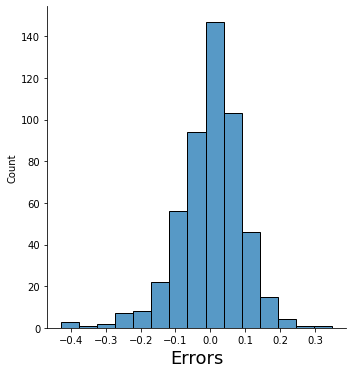

In [63]:
# Plot the histogram of the error terms
fig=plt.figure()
sns.displot((bike_y_train-bike_y_train_pred),bins=15)
fig.suptitle("Error terms", fontsize=20)
plt.xlabel("Errors",fontsize=18)

##  Step 7 Making Predictions Using the Final Model

In [64]:
#Apply the scaling on the test sets also
bike_test[num_vars]=scaler.transform(bike_test[num_vars])

In [65]:
bike_test.describe()

,temp,hum,windspeed,cnt,S2,S3,S4,yr_2019,Oct,Nov,...,Aug,Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,W2,W3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.479452,0.082192,0.073059,...,0.059361,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.233698,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.500722,0.275286,0.260830,...,0.236840,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for prediction

In [66]:
bike_y_test = bike_test.pop('cnt')
bike_X_test = bike_test

In [68]:
# Creating bike_X_test dataframe by dropping variables.
bike_X_test=bike_X_test[col]     # selecting columns via RFE
#Adding constant 
bike_X_test = sm.add_constant(bike_X_test)
bike_X_test = bike_X_test.drop(["Mar", "May", "Apr","S3","hum"], axis = 1)

In [69]:
bike_X_test

,const,temp,windspeed,S2,S4,yr_2019,Oct,Aug,Sep,W2,W3
184,1.0,0.831783,0.084219,0,0,0,0,0,0,1,0
535,1.0,0.901354,0.153728,1,0,1,0,0,0,0,0
299,1.0,0.511964,0.334206,0,1,0,1,0,0,1,0
221,1.0,0.881625,0.339570,0,0,0,0,1,0,0,0
152,1.0,0.817246,0.537414,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0.257562,0.287411,0,0,1,0,0,0,1,0
702,1.0,0.519232,0.283397,0,1,1,0,0,0,0,0
127,1.0,0.584649,0.069510,1,0,0,0,0,0,0,0
640,1.0,0.745598,0.052115,0,1,1,1,0,0,1,0


In [70]:
# Making predictions using the model
bike_y_test_pred=lm5.predict(bike_X_test)

## Step 8 Model Evaluation

In [71]:
mean_squared_error(bike_y_test,bike_y_test_pred)

0.009658531396284193

In [72]:
r2_score(bike_y_test,bike_y_test_pred)

0.7966445509101929

For bike_test , r2_score come around 79.66 which is pretty much closer to our model's Adjusted R_Sqaured =  0.828.

Text(0, 0.5, 'y_pred')

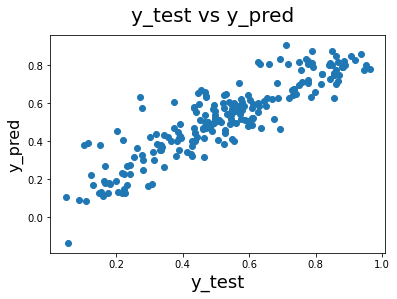

In [73]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(bike_y_test, bike_y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

Final Result : Overall we have a decent model, but we also acknowledge that we could do better.

We can see that the equation of our best fitted line is:

$cnt = 0.5124 \times temp - 0.1538 \times windspeed + 0.1033 \times S2 + 0.1252 \times S4 + 0.2331 \times yr\_2019 + 0.0357 \times Oct + 0.0589 \times Aug + 0.1185 \times Sep - 0.0818 \times W2 - 0.2843 \times W3 + 0.1310  $